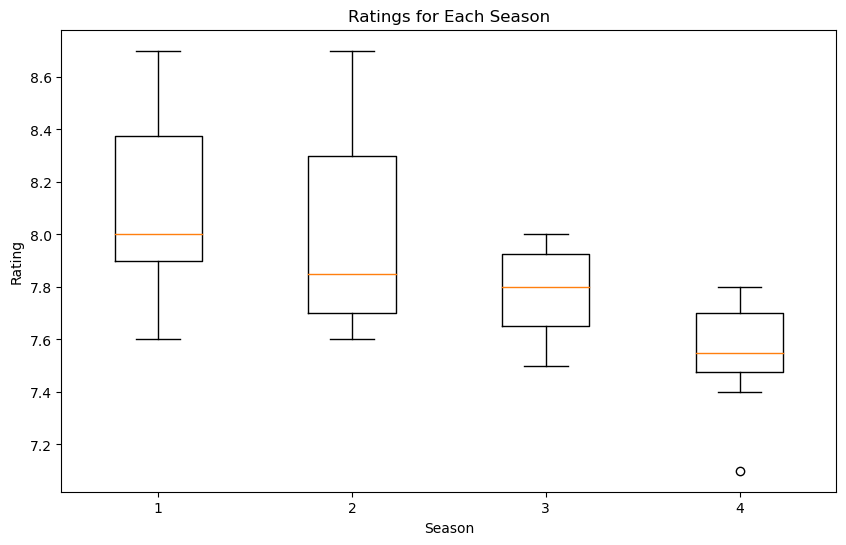

Episode names with average ratings above 8 for every season:
{1: ["Trompe L'Oeil", 'The Well-Tempered Clavier', 'The Bicameral Mind'], 2: ['Kiksuya', 'Vanishing Point', 'The Passenger']}
Episode names that aired before May 2019:
['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind', 'Journey Into Night', 'Reunion', 'Virtù e Fortuna', 'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space', 'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger']


TypeError: '>' not supported between instances of 'dict' and 'dict'

In [13]:
import requests
import json
import matplotlib.pyplot as plt

def download_data(url):
    """
    Downloads data from the provided API link.

    """
    response = requests.get(url)
    data = response.json()
    return data

def get_season_ratings(data):
    """
    Retrieves the overall ratings for each season.
 
    """
    season_ratings = {}

    for episode in data["_embedded"]["episodes"]:
        season = episode["season"]
        rating = episode["rating"]["average"]

        if season not in season_ratings:
            season_ratings[season] = []

        season_ratings[season].append(rating)

    return season_ratings

def plot_season_ratings(season_ratings):
    """
    Plots the ratings for each season. 
    
    """
    seasons = list(season_ratings.keys())
    ratings = list(season_ratings.values())

    plt.figure(figsize=(10, 6))
    plt.boxplot(ratings, labels=seasons)
    plt.xlabel("Season")
    plt.ylabel("Rating")
    plt.title("Ratings for Each Season")
    plt.show()

def get_highly_rated_episodes(data, rating_threshold):
    """
    Retrieves the episode names with average ratings above the given threshold for every season.
 
    """
    highly_rated_episodes = {}

    for episode in data["_embedded"]["episodes"]:
        season = episode["season"]
        rating = episode["rating"]["average"]
        episode_name = episode["name"]

        if rating > rating_threshold:
            if season not in highly_rated_episodes:
                highly_rated_episodes[season] = []

            highly_rated_episodes[season].append(episode_name)

    return highly_rated_episodes

def get_episodes_before_date(data, target_date):
    """ 

    Args:
        data: The JSON dataset.
        target_date: The target date in "YYYY-MM" format.
 
    """
    episodes_before_date = []

    for episode in data["_embedded"]["episodes"]:
        airdate = episode["airdate"]

        if airdate < target_date:
            episode_name = episode["name"]
            episodes_before_date.append(episode_name)

    return episodes_before_date

def get_episode_with_extremes(data, attribute):
    """  

    Returns:
        A dictionary with the episode name with the highest and lowest value for the attribute.
    """
    episode_with_extremes = {}

    for episode in data["_embedded"]["episodes"]:
        episode_name = episode["name"]
        attribute_value = episode[attribute]

        if attribute_value is not None:
            if attribute not in episode_with_extremes:
                episode_with_extremes[attribute] = {"highest": None, "lowest": None}

            if episode_with_extremes[attribute]["highest"] is None or attribute_value > episode_with_extremes[attribute]["highest"]:
                episode_with_extremes[attribute]["highest"] = attribute_value
                episode_with_extremes[attribute]["highest_name"] = episode_name

            if episode_with_extremes[attribute]["lowest"] is None or attribute_value < episode_with_extremes[attribute]["lowest"]:
                episode_with_extremes[attribute]["lowest"] = attribute_value
                episode_with_extremes[attribute]["lowest_name"] = episode_name

    return episode_with_extremes

def get_summary_most_popular_episode(data):
    """ 
    Returns:
        A dictionary with the summary of the most popular episode in each season.
    """
    most_popular_episodes = {}

    for episode in data["_embedded"]["episodes"]:
        season = episode["season"]
        rating = episode["rating"]["average"]
        summary = episode["summary"].strip("<p>").strip("</p>")

        if season not in most_popular_episodes or rating > most_popular_episodes[season]["rating"]:
            most_popular_episodes[season] = {
                "rating": rating,
                "summary": summary
            }

    return most_popular_episodes

def main():
    url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

    # Download the data
    data = download_data(url)

    # Get all the overall ratings for each season and plot the ratings
    season_ratings = get_season_ratings(data)
    plot_season_ratings(season_ratings)

    # Get all the episode names with average ratings above 8 for every season
    highly_rated_episodes = get_highly_rated_episodes(data, 8)
    print("Episode names with average ratings above 8 for every season:")
    print(highly_rated_episodes)

    # Get all the episode names that aired before May 2019
    episodes_before_date = get_episodes_before_date(data, "2019-05")
    print("Episode names that aired before May 2019:")
    print(episodes_before_date)

    # Get the episode name with the highest and lowest rating
    episode_ratings = get_episode_with_extremes(data, "rating")
    print("Episode name with the highest and lowest rating:")
    print(episode_ratings["rating"])

    # Get the summary for the most popular episode in every season
    most_popular_episodes = get_summary_most_popular_episode(data)
    print("Summary for the most popular episode in every season:")
    print(most_popular_episodes)

if __name__ == "__main__":
    main()


In [ ]:
Explanation:

The program starts by defining functions to download the data from the given API link and extract the desired information.

The get_season_ratings function retrieves the overall ratings for each season. It iterates over the episodes and stores the ratings in a dictionary, grouped by season.

The plot_season_ratings function uses the matplotlib library to plot the ratings for each season as boxplots.

The get_highly_rated_episodes function retrieves the episode names with average ratings above a given threshold for every season. It iterates over the episodes, filters based on the rating threshold, and stores the episode names in a dictionary, grouped by season.

The get_episodes_before_date function retrieves the episode names that aired before a given date. It iterates over the episodes, filters based on the airdate, and stores the episode names in a list.

The get_episode_with_extremes function retrieves the episode name with the highest and lowest value for a given attribute. It iterates over the episodes, keeps track of the highest and lowest values, and stores the corresponding episode names in a dictionary.

The get_summary_most_popular_episode function retrieves the summary for the most popular episode in each season. It iterates over the episodes, tracks the highest ratings, and stores the corresponding summaries in a dictionary.

The main function defines the program's flow. It downloads the data, calls the necessary functions to analyze the data, and prints the results.